In [1]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Example 1
From OR-tools https://developers.google.com/optimization/mip/mip_example \
Maximize $x + 10y$ with following constraints:\
$x + 7y \leq 17.5$\
$0 \leq x \leq 3.5$\
$0 \leq y$\
$x, y$ integers

In [2]:
def f(x_arr, y_arr):
    return x + 7*y - 17.5
x_arr = np.array([0,1,2,3])
y_arr = np.arange(0, 4, 1)

In [3]:
xv, yv = np.meshgrid(x_arr,y_arr)

Plot possible solutions; all the possible points (x,y)\
Plot the constraints:
y = 17.5/7 - x/7

In [4]:
def g(x):
    return 17.5/7 -x/7
xx = np.arange(0, 3.5 + 0.1, 0.1)
yy = g(xx)

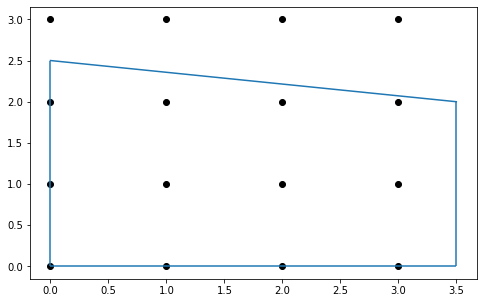

In [5]:
# The solution is inside the blue box and on its boundaries
plt.figure(figsize=(8,5))
plt.plot(xv, yv, marker = 'o', color = 'k', linestyle = 'none')
plt.plot(xx,yy)
plt.hlines(0, 0, 3.5)
plt.vlines(0, 0, 2.5)
plt.vlines(3.5, 0, np.min(yy))

In [6]:
solver = pywraplp.Solver.CreateSolver("SAT")

In [7]:
infinity = solver.infinity()
x = solver.IntVar(0, infinity, "x") #Integer variable vary from 0 (then why float 0.0?) to infinity
y = solver.IntVar(0, infinity, "y")

In [8]:
# Constraints
solver.Add(x + 7*y <= 17.5)
solver.Add(x <= 3.5)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000001573ADD36C0> >

In [9]:
# Maximize objective function
solver.Maximize(x + 10*y)

In [10]:
status = solver.Solve()

In [11]:
solver.Objective().Value()

23.0

In [12]:
# Solution
print(x.solution_value())
print(y.solution_value())

3.0
2.0


# Linear optimization of the same problem

In [13]:
solver = pywraplp.Solver.CreateSolver("GLOP") # Linear programming solver GLOP

In [14]:
x = solver.NumVar(0.0, infinity, "x") # continuous variables
y = solver.NumVar(0.0, infinity, "y")

In [15]:
# Constraints
solver.Add(x + 7*y <= 17.5)
solver.Add(x <= 3.5)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000001574527CE70> >

In [16]:
solver.Maximize(x + 10*y)

In [17]:
status = solver.Solve()

In [18]:
solver.Objective().Value()

25.0

In [19]:
print(x.solution_value())
print(y.solution_value())

0.0
2.5


In [20]:
if status == pywraplp.Solver.OPTIMAL:
    print("Solution:")
    print("Objective value =", solver.Objective().Value())
    print("x =", x.solution_value())
    print("y =", y.solution_value())
else:
    print("The problem does not have an optimal solution.")

Solution:
Objective value = 25.0
x = 0.0
y = 2.5


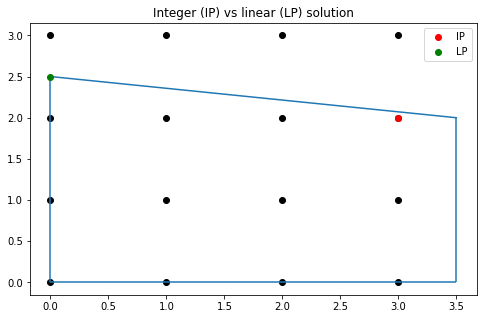

In [25]:
# The solution is inside the blue box and on its boundaries
plt.figure(figsize=(8,5))
plt.plot(xv, yv, marker = 'o', color = 'k', linestyle = 'none')
plt.plot(xx,yy)
plt.hlines(0, 0, 3.5)
plt.vlines(0, 0, 2.5)
plt.vlines(3.5, 0, np.min(yy))
plt.plot(3,2, 'ro', label = "IP")
plt.plot(0,2.5, 'go', label = "LP")
plt.title("Integer (IP) vs linear (LP) solution")
plt.legend()
# plt.savefig('optimization.jpg', dpi = 300, bbox_inches='tight')